# Analysis of AFL Data -Sai Kiran Ravula

In [59]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
#CSS Styling for better view of the notebook

from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-style:italic;
font-size:1.4em;
line-height:1.4em;
padding-left:0em;
padding-right:0em;
}
</style>
""")

In [3]:
#Setting default parameters of the plot 

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
FIGURE_SIZE = (8,6)

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize = FIGURE_SIZE)  # controls figuresize 

In [40]:
#Reading AFL data from CSV file

afl_data = pd.read_csv('RawData.csv')

In [41]:
#Print Shape of the dataframe

print("Shape of the dataframe(row, column) :", afl_data.shape)

Shape of the dataframe(row, column) : (146607, 32)


In [42]:
#to check if there are any missing values in the dataframe

print("Number of missing values in the dataframe are :", afl_data.isnull().sum().sum())

Number of missing values in the dataframe are : 0


In [43]:
#Find out data types of columns

afl_data.dtypes

Date                object
Name                object
Team                object
Season             float64
Round               object
Home Team           object
Away Team           object
Home Score           int64
Away Score           int64
Margin               int64
Disposals          float64
Kicks              float64
Marks              float64
Handballs          float64
Goals              float64
Behinds            float64
Hitouts            float64
Tackles            float64
Rebounds           float64
Inside 50s         float64
Clearances         float64
Clangers           float64
Frees For          float64
Frees Against      float64
Contested Pos      float64
Uncontested Pos    float64
Contested Marks    float64
Marks Inside 50    float64
One Percenters     float64
Goal Assists       float64
Brownlow Votes     float64
TOG                  int64
dtype: object

In [44]:
#Convert Season from float to int for convinience 

afl_data['Season'] = afl_data['Season'].astype(int)

In [45]:
afl_data.head()

,Date,Name,Team,Season,Round,Home Team,Away Team,Home Score,Away Score,Margin,...,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG
0,2019-09-28 00:00:00,Zac Williams,Greater Western Sydney,2019,GF,Richmond,Greater Western Sydney,114,25,89,...,0.0,0.0,7.0,13.0,0.0,1.0,0.0,0.0,0.0,68
1,2019-09-28 00:00:00,Lachie Whitfield,Greater Western Sydney,2019,GF,Richmond,Greater Western Sydney,114,25,89,...,0.0,1.0,4.0,9.0,0.0,0.0,1.0,0.0,0.0,91
2,2019-09-28 00:00:00,Adam Tomlinson,Greater Western Sydney,2019,GF,Richmond,Greater Western Sydney,114,25,89,...,0.0,1.0,6.0,11.0,0.0,0.0,1.0,0.0,0.0,83
3,2019-09-28 00:00:00,Sam Taylor,Greater Western Sydney,2019,GF,Richmond,Greater Western Sydney,114,25,89,...,1.0,0.0,6.0,8.0,1.0,0.0,9.0,0.0,0.0,91
4,2019-09-28 00:00:00,Tim Taranto,Greater Western Sydney,2019,GF,Richmond,Greater Western Sydney,114,25,89,...,3.0,1.0,15.0,18.0,0.0,0.0,1.0,0.0,0.0,80


In [46]:
#Dividing the dataframe into training and test based on the year condition

afl_data_training = afl_data[afl_data['Season'] <= 2015] 

afl_data_test = afl_data[afl_data['Season'] > 2015] 

In [47]:
#Print Shape of the training and test dataframes

print("Shape of the training dataframe(row, column) :", afl_data_training.shape)

print("Shape of the testing dataframe(row, column) :", afl_data_test.shape)

Shape of the training dataframe(row, column) : (110175, 32)
Shape of the testing dataframe(row, column) : (36432, 32)


In [48]:
afl_data_training.head()

,Date,Name,Team,Season,Round,Home Team,Away Team,Home Score,Away Score,Margin,...,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG
27412,2015-07-18 00:00:00,Zac Williams,Greater Western Sydney,2015,16,Gold Coast,Greater Western Sydney,79,94,-15,...,0.0,1.0,3.0,17.0,0.0,0.0,1.0,0.0,0.0,81
27413,2015-07-18 00:00:00,Lachie Whitfield,Greater Western Sydney,2015,16,Gold Coast,Greater Western Sydney,79,94,-15,...,0.0,2.0,2.0,15.0,0.0,0.0,1.0,1.0,0.0,91
27414,2015-07-18 00:00:00,Callan Ward,Greater Western Sydney,2015,16,Gold Coast,Greater Western Sydney,79,94,-15,...,1.0,1.0,15.0,17.0,2.0,2.0,0.0,0.0,1.0,82
27415,2015-07-18 00:00:00,Adam Treloar,Greater Western Sydney,2015,16,Gold Coast,Greater Western Sydney,79,94,-15,...,0.0,1.0,3.0,16.0,0.0,0.0,0.0,3.0,0.0,81
27416,2015-07-18 00:00:00,Adam Tomlinson,Greater Western Sydney,2015,16,Gold Coast,Greater Western Sydney,79,94,-15,...,0.0,0.0,5.0,13.0,0.0,0.0,6.0,0.0,0.0,94


In [49]:
afl_data_training.columns

Index(['Date', 'Name', 'Team', 'Season', 'Round', 'Home Team', 'Away Team',
       'Home Score', 'Away Score', 'Margin', 'Disposals', 'Kicks', 'Marks',
       'Handballs', 'Goals', 'Behinds', 'Hitouts', 'Tackles', 'Rebounds',
       'Inside 50s', 'Clearances', 'Clangers', 'Frees For', 'Frees Against',
       'Contested Pos', 'Uncontested Pos', 'Contested Marks',
       'Marks Inside 50', 'One Percenters', 'Goal Assists', 'Brownlow Votes',
       'TOG'],
      dtype='object')

## Criterion used for selecting the predictors is:

##### Columns containing String values such as Player Name, Team, Round, Home Team and Away Team are not considered as predictors

##### Column such as Margin is not considered as it provides redundant information because its the difference between home and away score

In [50]:
# Predictor and target columns

pred_cols = ['Home Score', 'Away Score', 'Disposals', 'Kicks', 'Marks', 'Handballs', 
             'Goals', 'Behinds', 'Hitouts', 'Tackles', 'Rebounds', 'Inside 50s', 'Clearances', 'Clangers', 
             'Frees For', 'Frees Against','Contested Pos', 'Uncontested Pos', 'Contested Marks','Marks Inside 50',
             'One Percenters', 'Goal Assists', 'TOG']

target_col = 'Brownlow Votes'

In [65]:
X = afl_data_training[pred_cols]

y = afl_data_training[target_col]

#Maximum number of features that can be selected

tot = np.arange(1,23)            

high_score=0

#Variable to store the optimum features

nof=0           

score_list =[]

for n in range(len(tot)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = tot[n]

print("Optimum number of features: %d" %nof)

print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 22
Score with 22 features: 0.203036


In [64]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 22)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Home Score', 'Disposals', 'Kicks', 'Marks', 'Handballs', 'Goals',
       'Behinds', 'Hitouts', 'Tackles', 'Rebounds', 'Inside 50s', 'Clearances',
       'Clangers', 'Frees For', 'Frees Against', 'Contested Pos',
       'Uncontested Pos', 'Contested Marks', 'Marks Inside 50',
       'One Percenters', 'Goal Assists', 'TOG'],
      dtype='object')


### All the selected predictor columns except Away Score turned out to be important.

## Checking the distribution of Some key variables in the data frame


Text(0, 0.5, 'Density')

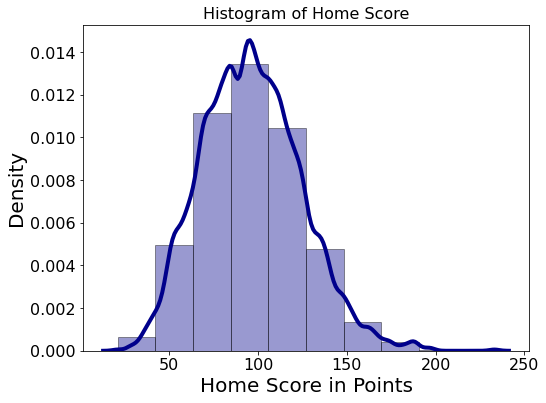

In [66]:
#Distribution for home score variable using distribution plot

home_score_plot = sbs.distplot(afl_data_training['Home Score'], hist = True, bins = 10, color = 'darkblue', 
                                hist_kws = {'edgecolor':'black'},kde_kws={'linewidth': 4})

plt.title("Histogram of Home Score")

plt.xlabel("Home Score in Points")

plt.ylabel("Density")

Text(0, 0.5, 'Density')

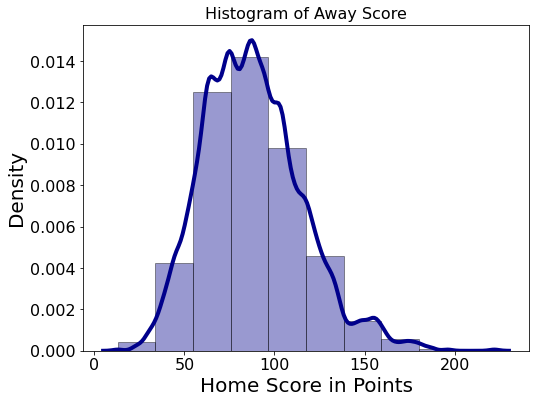

In [67]:
#Distribution for away score variable using distribution plot

away_score_plot = sbs.distplot(afl_data_training['Away Score'], hist = True, bins = 10, color = 'darkblue', 
                                hist_kws = {'edgecolor':'black'},kde_kws={'linewidth': 4})

plt.title("Histogram of Away Score")

plt.xlabel("Home Score in Points")

plt.ylabel("Density")

Text(0, 0.5, 'Density')

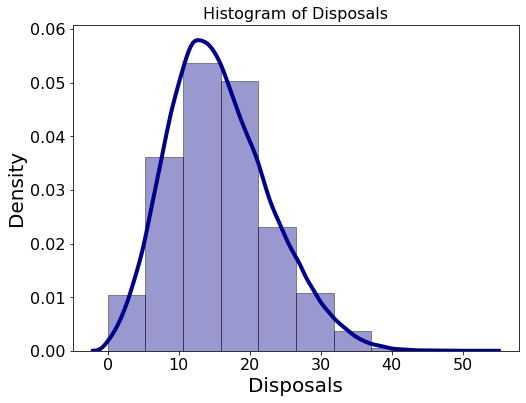

In [68]:
#Distribution for disposals variable using distribution plot

disposals_plot = sbs.distplot(afl_data_training['Disposals'], hist = True, bins = 10, color = 'darkblue', 
                                hist_kws = {'edgecolor':'black'},kde_kws={'linewidth': 4})

plt.title("Histogram of Disposals")

plt.xlabel("Disposals")

plt.ylabel("Density")

Text(0, 0.5, 'Density')

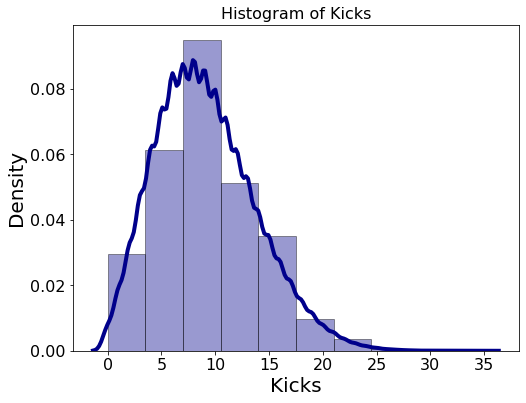

In [69]:
#Distribution for kicks variable using distribution plot

kicks_plot = sbs.distplot(afl_data_training['Kicks'], hist = True, bins = 10, color = 'darkblue', 
                                hist_kws = {'edgecolor':'black'},kde_kws={'linewidth': 4})

plt.title("Histogram of Kicks")

plt.xlabel("Kicks")

plt.ylabel("Density")

Text(0, 0.5, 'Density')

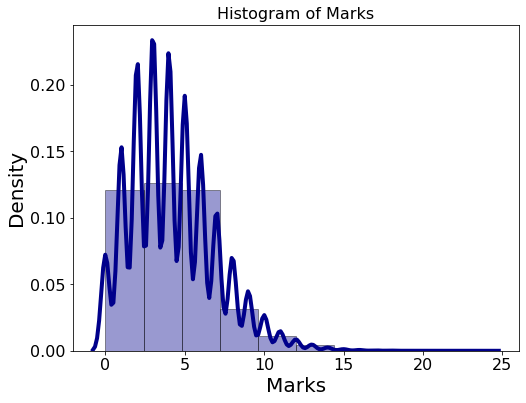

In [70]:
#Distribution for marks variable using distribution plot

marks_plot = sbs.distplot(afl_data_training['Marks'], hist = True, bins = 10, color = 'darkblue', 
                                hist_kws = {'edgecolor':'black'},kde_kws={'linewidth': 4})

plt.title("Histogram of Marks")

plt.xlabel("Marks")

plt.ylabel("Density")

In [71]:
#Dividing the columns to create Independednt and Predictor variables

X_train = afl_data_training.loc[:, pred_cols]

y_train = afl_data_training.loc[:,'Brownlow Votes']


X_test = afl_data_test.loc[:, pred_cols]

y_test = afl_data_test.loc[:,'Brownlow Votes']

## Modelling:

### Logistic Regression

In [72]:
#Running LogisticRegression on the data:

logistic_model = LogisticRegression(random_state=13)

logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=13)

In [73]:
y_predLR_train = logistic_model.predict(X_train)

y_predLR_test  = logistic_model.predict(X_test)

In [74]:
#Printing Accuracy scores across dataframes

print("Accuracy score of Training dataset is : ",accuracy_score(y_train,y_predLR_train))

print("Accuracy score of testing dataset is : ",accuracy_score(y_test,y_predLR_test))

Accuracy score of Training dataset is :  0.937426820966644
Accuracy score of testing dataset is :  0.9398880105401844


## Random Forest

In [75]:
##Random Forest Classifier Algorithm with some random depth

rf = RandomForestClassifier(max_depth=7, random_state=23)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=23)

In [76]:
y_predRF_train = rf.predict(X_train)

y_predRF_test  = rf.predict(X_test)

In [77]:
#print("Random Forest Classifier\n")
print("Accuracy of Training Dataset:\t",   accuracy_score(y_predRF_train, y_train))

print("Accuracy of Testing Dataset:\t",    accuracy_score(y_predRF_test,  y_test))

Accuracy of Training Dataset:	 0.9379532561833447
Accuracy of Testing Dataset:	 0.9393664909969258


## Naive Bayes

In [78]:
##Naive Baye's Classifier Algorithm 

nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [79]:
y_predNB_train = nb.predict(X_train)

y_predNB_test  = nb.predict(X_test)

In [80]:
print("Accuracy of Training Dataset:\t",   accuracy_score(y_predNB_train, y_train))

print("Accuracy of Testing Dataset:\t",    accuracy_score(y_predNB_test,  y_test))

Accuracy of Training Dataset:	 0.8503653278874518
Accuracy of Testing Dataset:	 0.8301218708827405


## Neural Networks

In [81]:
##Neural Networks - MLP Classifier Algorithm


mlp = MLPClassifier(random_state=23,solver='lbfgs')

mlp.fit(X_train, y_train)

MLPClassifier(random_state=23, solver='lbfgs')

In [82]:
y_predNN_train = mlp.predict(X_train)

y_predNN_test  = mlp.predict(X_test)

In [83]:
print("Accuracy of Training Dataset:\t",   accuracy_score(y_predNN_train, y_train))

print("Accuracy of Testing Dataset:\t",    accuracy_score(y_predNN_test,  y_test))

Accuracy of Training Dataset:	 0.9350306330837305
Accuracy of Testing Dataset:	 0.9370059288537549


## Producing a plot with all the model accuracies

In [85]:
model  = ['Logistic Regression', 'Random Forest', "Naive Baye's", 'Neural Network']

trAcc  = [accuracy_score(y_predLR_train, y_train), accuracy_score(y_predRF_train, y_train),
       accuracy_score(y_predNB_train, y_train), accuracy_score(y_predNN_train, y_train)]


tesAcc = [accuracy_score(y_predLR_test,  y_test), accuracy_score(y_predRF_test,  y_test),
       accuracy_score(y_predNB_test,  y_test), accuracy_score(y_predNN_test,  y_test)]


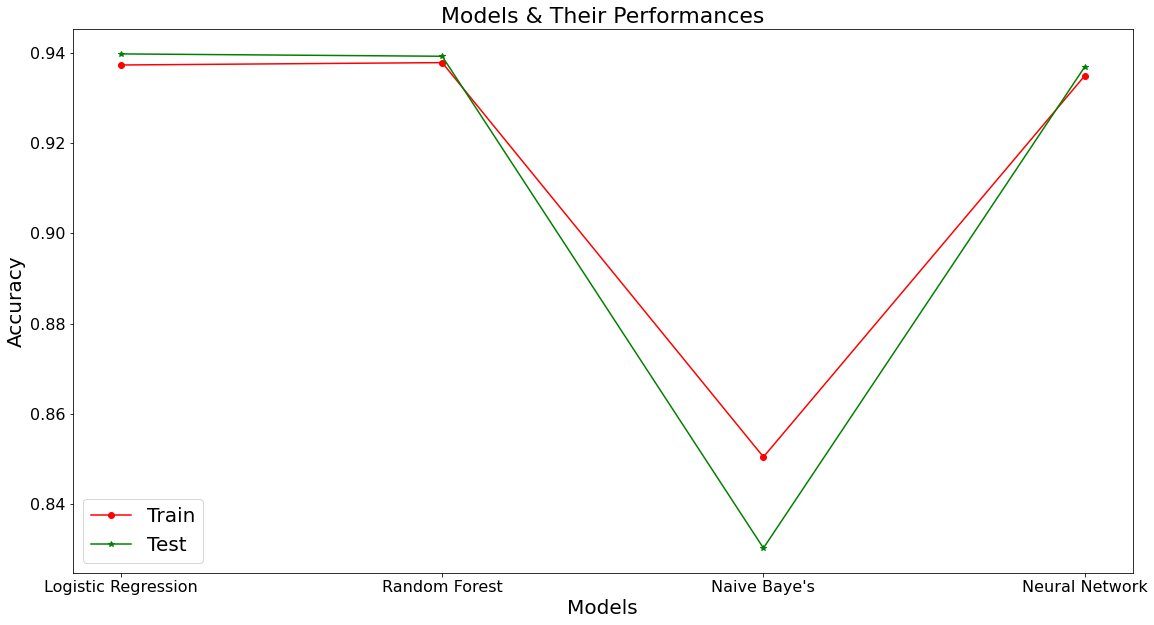

In [86]:
plt.figure(figsize = (19, 10))
plt.plot(model, trAcc, "o-", label = "Train", color = "red")
plt.plot(model, tesAcc, "*-", label = "Test", color = "green")
plt.legend(fontsize=20)
plt.xlabel("Models", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Models & Their Performances", fontsize = 22)
plt.show()

### With the basic model signatures, Random Forest model proved to be the significant among the few tried models